In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
from mlxtend.plotting import scatterplotmatrix

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import streamlit as st

In [2]:
raw_data = pd.read_csv('train.csv', sep=',', index_col=0) # Naming the train data "raw_data"
test_data = pd.read_csv('test.csv', sep=',', index_col=0) # Naming the test data "test_data"

In [3]:
print(raw_data.isnull().sum()) # Checking how many NaN there are
raw_data.head()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


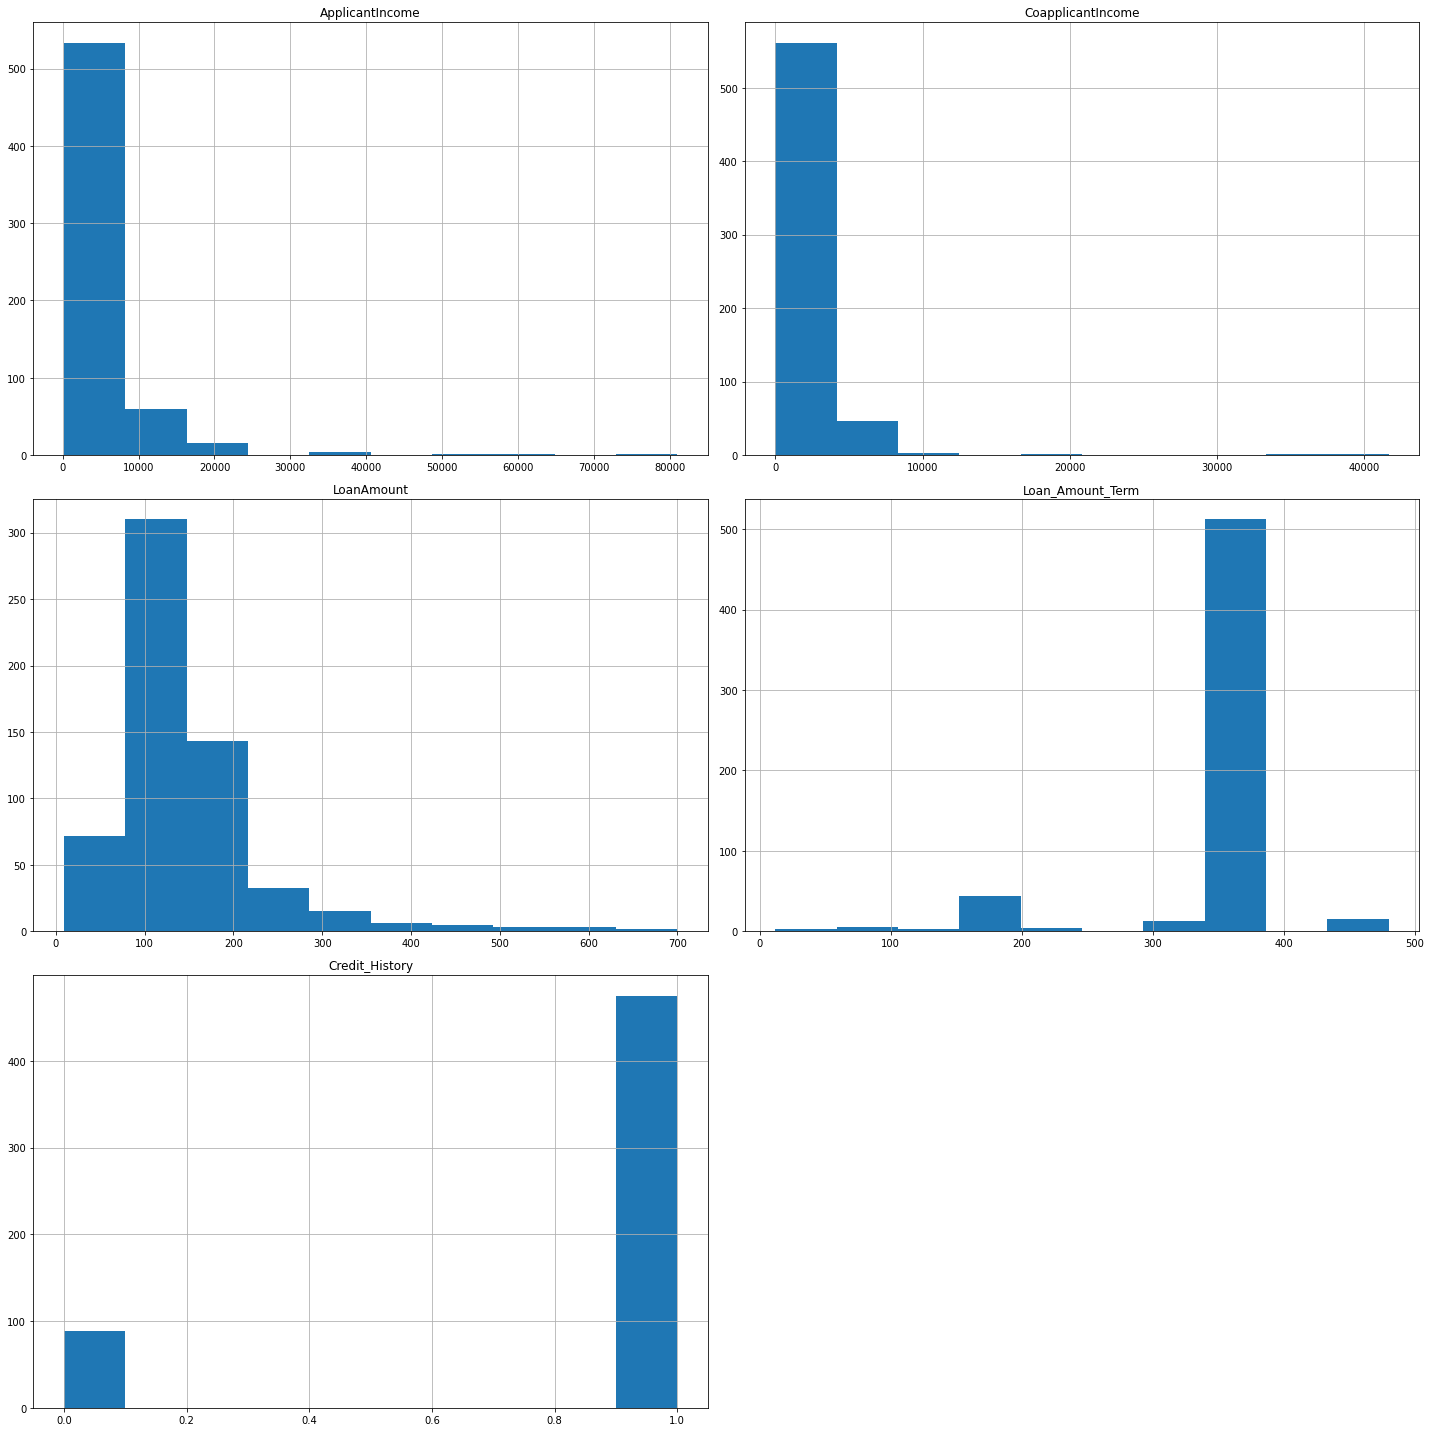

In [4]:
# Histograms below

raw_data.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

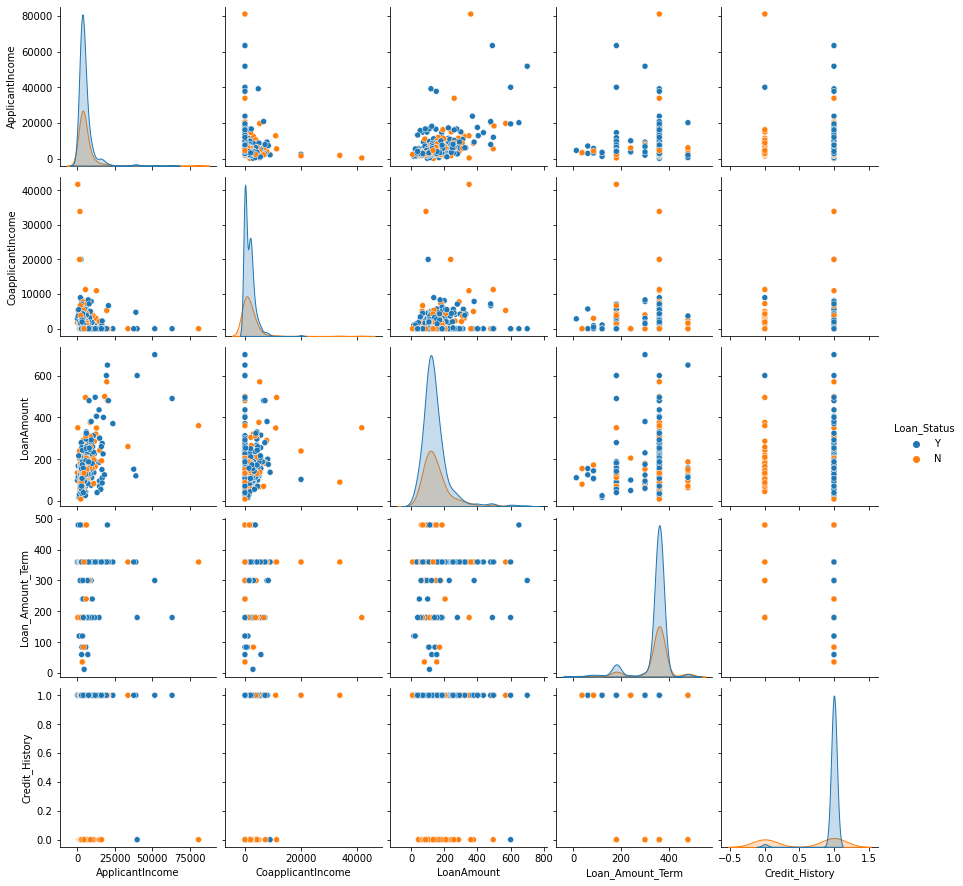

In [10]:
# Pairplots below

sns.pairplot(raw_data, hue='Loan_Status')

### Data cleaning

In [5]:
# Using get_dummies to convert categorical values to numerical values

le = LabelEncoder()

raw_data.Education = le.fit_transform(raw_data.Education)
raw_data.Dependents = le.fit_transform(raw_data.Dependents)

dummies = pd.get_dummies(raw_data[['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Status']], drop_first=True)
dummies2 = pd.get_dummies(test_data[['Gender', 'Married', 'Self_Employed', 'Property_Area']], drop_first=True)

enc_data = pd.concat([raw_data, dummies], axis=1) # Merging / concatenating two dataframes
enc_data = enc_data._get_numeric_data()
enc_data

# imp = SimpleImputer(missing_values=np.NaN, strategy='median')
# imp_data = imp.fit_transform(raw_data.values)
# imp_df = pd.DataFrame(data=imp_data, columns=raw_data.columns)

# imp_df.head() # Checking if the imputer worked

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001002,0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,1
LP001003,1,0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
LP001005,0,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,1
LP001006,0,1,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1
LP001008,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1
LP002979,3,0,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1
LP002983,1,0,8072,240.0,253.0,360.0,1.0,1,1,0,0,1,1


In [6]:
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
imp_data = imp.fit(enc_data.values)
imp_data = imp.transform(enc_data.values)
imp_df = pd.DataFrame(imp_data, columns=enc_data.columns)

imp_df.head() # Checking if the imputer worked

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,1.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [7]:
test_data.Education = le.fit_transform(test_data.Education)
test_data.Dependents = le.fit_transform(test_data.Dependents)

enc_test = pd.concat([test_data, dummies2], axis=1) # Merging / concatenating two dataframes
enc_test = enc_test._get_numeric_data()
enc_test

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,
LP001015,0,0,5720,0,110.0,360.0,1.0,1,1,0,0,1
LP001022,1,0,3076,1500,126.0,360.0,1.0,1,1,0,0,1
LP001031,2,0,5000,1800,208.0,360.0,1.0,1,1,0,0,1
LP001035,2,0,2340,2546,100.0,360.0,NaN,1,1,0,0,1
LP001051,0,1,3276,0,78.0,360.0,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,3,1,4009,1777,113.0,360.0,1.0,1,1,1,0,1
LP002975,0,0,4158,709,115.0,360.0,1.0,1,1,0,0,1
LP002980,0,0,3250,1993,126.0,360.0,NaN,1,0,0,1,0


In [8]:
imp2 = SimpleImputer(missing_values=np.NaN, strategy='median')
imp_test = imp2.fit(enc_test.values)
imp_test = imp2.transform(enc_test.values)
imp_test_df = pd.DataFrame(imp_test, columns=enc_test.columns)

imp_test_df.head() # Checking if the imputer worked

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,5720.0,0.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,3076.0,1500.0,126.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2.0,0.0,5000.0,1800.0,208.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0
3,2.0,0.0,2340.0,2546.0,100.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,3276.0,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0


### Checking if there are any NaN values:

In [9]:
print(imp_df.isna().sum()) # Checking if the NaN values are gone from the training data
print(f'\n{imp_test_df.isna().sum()}\n') # Checking if the NaN values are gone from the test data
print(f'\nThe shape of the imputed training data is: {imp_df.shape}\n')
print(f'\nThe shape of the imputed testing data is: {imp_test_df.shape}\n')

Dependents                 0
Education                  0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

Dependents                 0
Education                  0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


The shape of the imputed training data is: (614, 13)


The shape of the imputed testing data is: (367, 12)



In [10]:
imp_df.info() # Checking the data types, should be all float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   Education                614 non-null    float64
 2   ApplicantIncome          614 non-null    float64
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Gender_Male              614 non-null    float64
 8   Married_Yes              614 non-null    float64
 9   Self_Employed_Yes        614 non-null    float64
 10  Property_Area_Semiurban  614 non-null    float64
 11  Property_Area_Urban      614 non-null    float64
 12  Loan_Status_Y            614 non-null    float64
dtypes: float64(13)
memory usage: 62.5 KB


In [11]:
imp_test_df.info() # Checking the data types, should be all float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               367 non-null    float64
 1   Education                367 non-null    float64
 2   ApplicantIncome          367 non-null    float64
 3   CoapplicantIncome        367 non-null    float64
 4   LoanAmount               367 non-null    float64
 5   Loan_Amount_Term         367 non-null    float64
 6   Credit_History           367 non-null    float64
 7   Gender_Male              367 non-null    float64
 8   Married_Yes              367 non-null    float64
 9   Self_Employed_Yes        367 non-null    float64
 10  Property_Area_Semiurban  367 non-null    float64
 11  Property_Area_Urban      367 non-null    float64
dtypes: float64(12)
memory usage: 34.5 KB


### Visualisation after cleaning

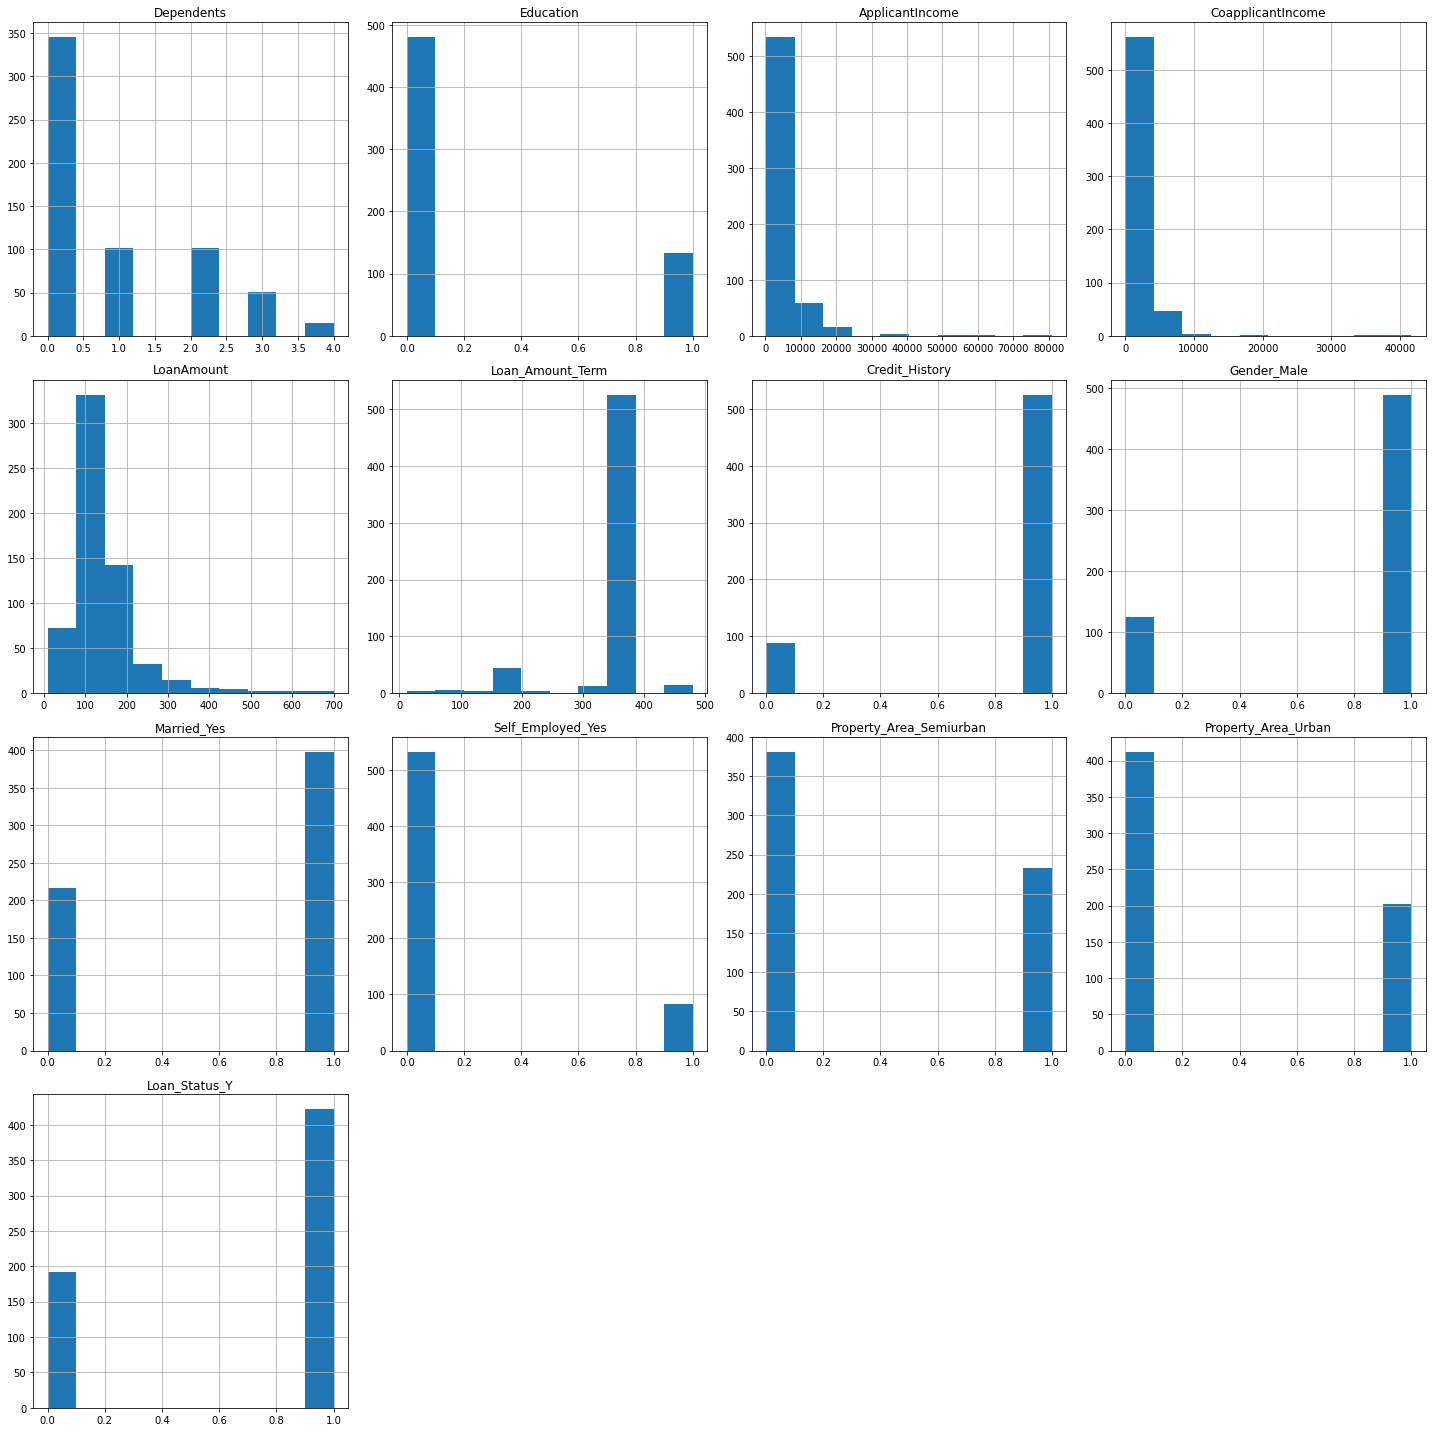

In [12]:
# Histograms

imp_df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

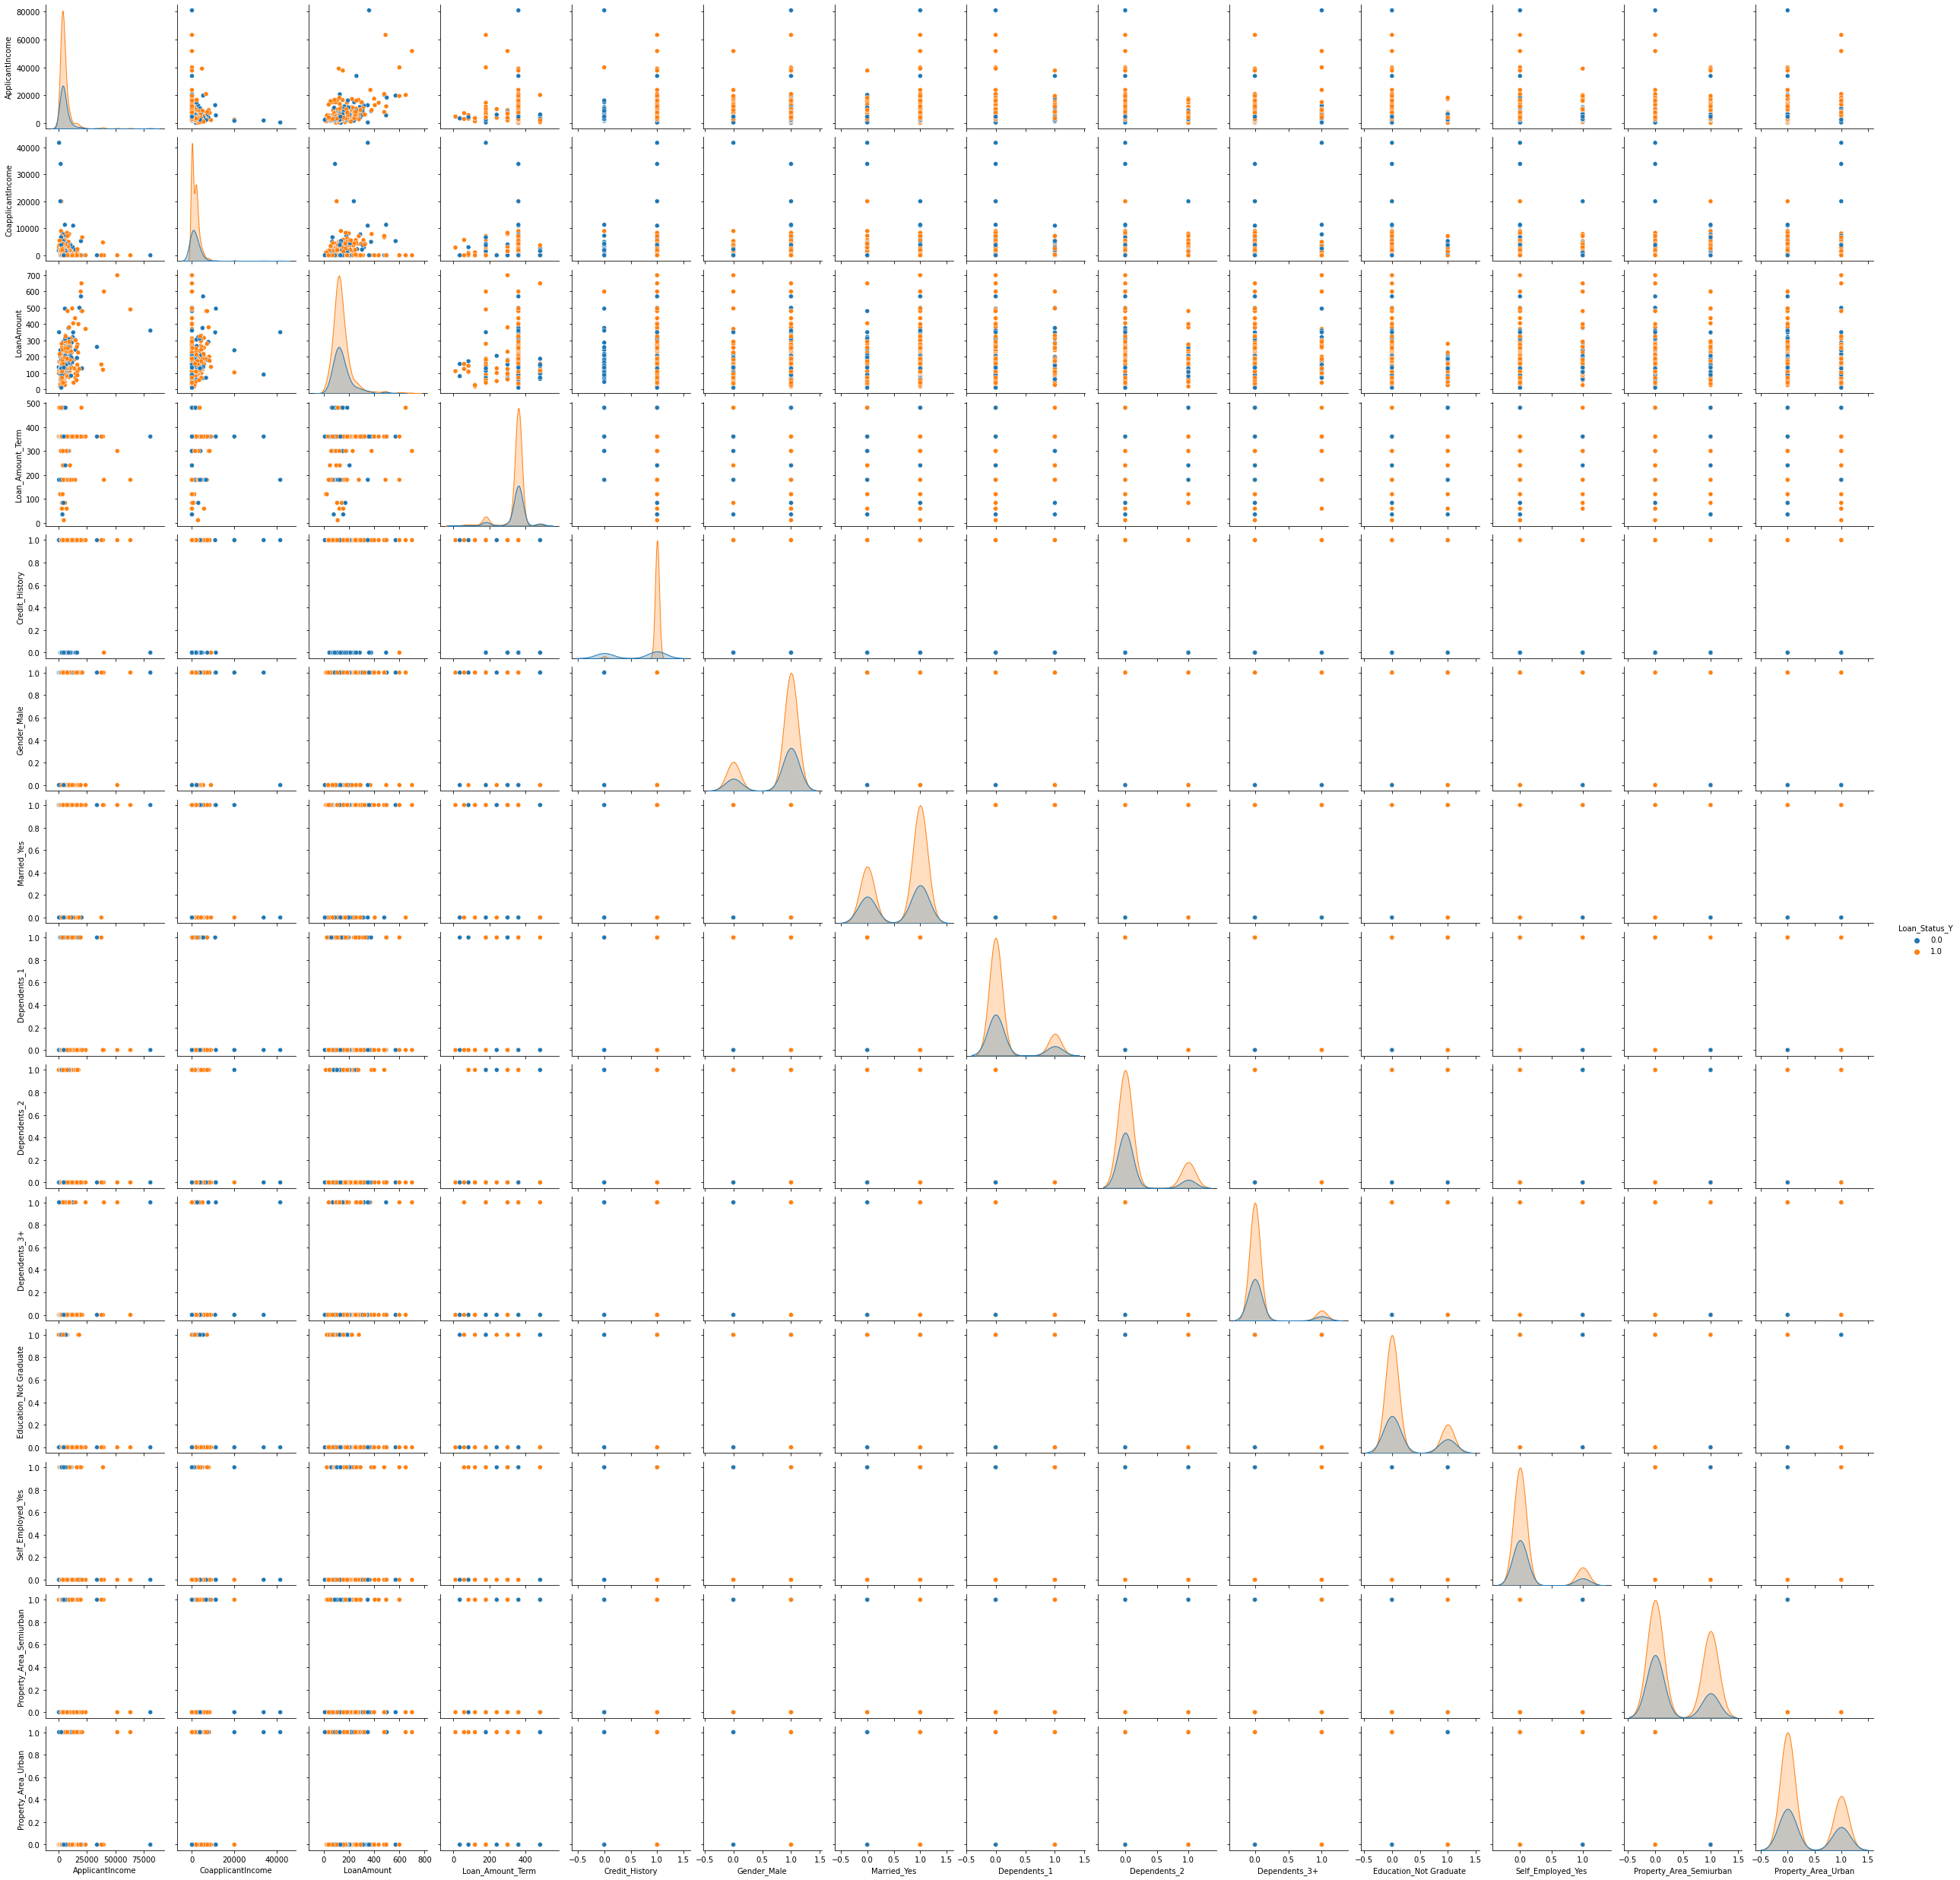

In [22]:
# Pairplot

sns.pairplot(imp_df, hue='Loan_Status_Y')

### Correlation Matrix

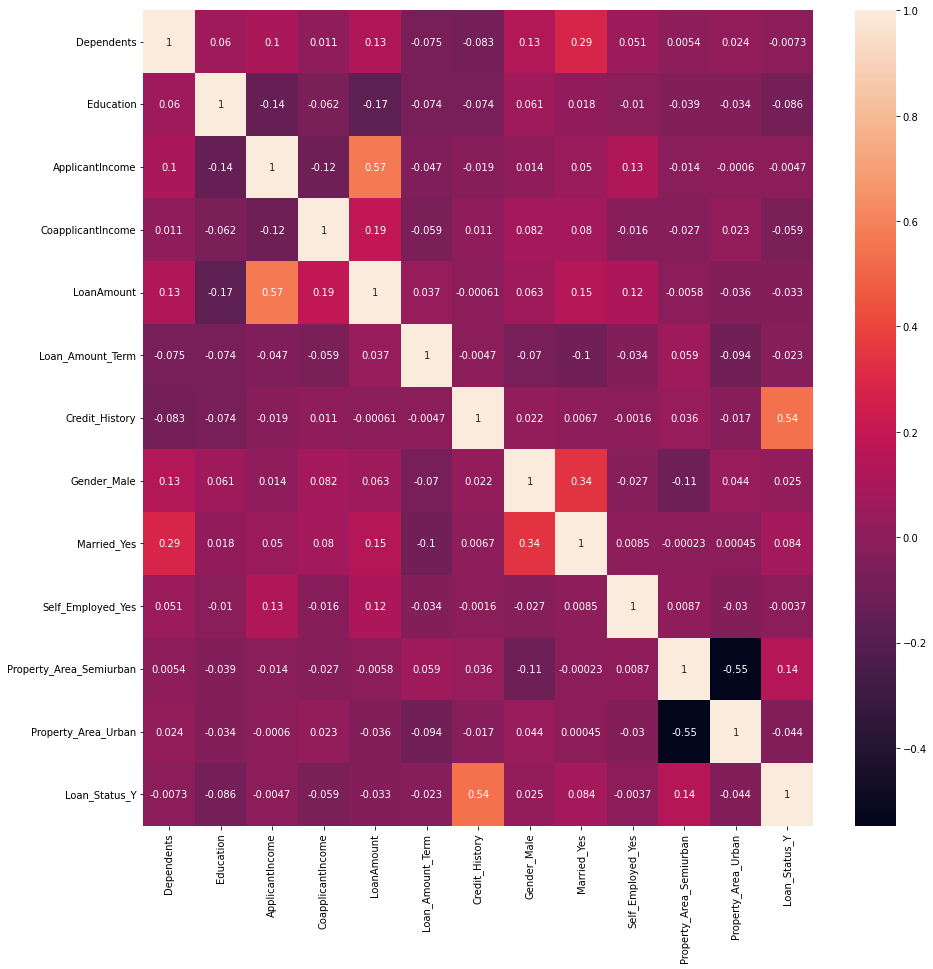

In [13]:
# Correlation matrix

plt.figure(figsize=(15, 15)) # Making it big for easier inspection
corr_matrix = imp_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

We see that loan status positively correlates with both applicant income and credit history. Loan amount also correlates with both applicant income and credit history.
Something to note is that married males also positively correlate higher with loan status than unmarried males.
We have to look at that with skepticism since gender should not be something that makes it easier or harder to get a loan.

### Preprocessing

In [14]:
X = imp_df.drop(['Loan_Status_Y'], axis=1)
y = imp_df['Loan_Status_Y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(429, 12) (185, 12) (429,) (185,)


### Random Forest Pipeline

In [61]:
forest = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=21))

param_dist = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 300],
    'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
    'randomforestclassifier__min_samples_leaf': [1, 5, 10],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__bootstrap': [True, False]
}

forest_gs = GridSearchCV(estimator=forest, param_grid=param_dist, scoring='r2', cv=5, n_jobs=-1)

In [62]:
forest_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__bootstrap': [True, False],
                         'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt'],
                         'randomforestclassifier__min_samples_leaf': [1, 5, 10],
                         'randomforestclassifier__n_estimators': [50, 100, 200,
                                                                  300]},
             scoring='r2')

In [63]:
best_params = forest_gs.best_params_

print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 300}


In [64]:
forest_best =  forest_gs.best_estimator_
forest_best.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=21))])

In [65]:
y_pred = forest_best.predict(imp_test_df)

print('Forest training data accuracy: {0:.2f}'.format(forest_best.score(X_train, y_train)))

print('Forest test data accuracy: {0:.2f}'.format(forest_best.score(X_test, y_test)))

Forest training data accuracy: 0.93
Forest test data accuracy: 0.78


### Kernel Pipeline

In [ ]:
svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=21))

param_dist = [{'svc__C': np.arange(5, 7, 1),
'svc__kernel':['rbf', 'linear'],
'svc__gamma': ['scale', 'auto']},
              {'svc__C': np.arange(5, 7, 1),
               'svc__kernel':['linear']},]

g_search_kernel = GridSearchCV(estimator=svc_pipe,
                                     param_grid=param_dist,
                                     scoring='r2',
                                     cv=10, 
                                     n_jobs=-1)

In [ ]:
g_search_kernel.fit(X_train, y_train) # Finding the best parameters for SVC Kernel

In [ ]:
best_params = g_search_kernel.best_params_
print('The best parameters achieved from the grid search are: ', best_params)

In [ ]:
kernel_best =  g_search_kernel.best_estimator_
kernel_best.fit(X, y) # Fitting the best parameters into the model

In [ ]:
y_pred = kernel_best.predict(imp_test_df)

print('Kernel training data accuracy: {0:.2f}'.format(kernel_best.score(X_train, y_train)))

print('Kernel test data accuracy: {0:.2f}'.format(kernel_best.score(X_test, y_test)))

### Gradient Boosting Classifier

In [ ]:
gbc_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=21))

param_dist = [{'gradientboostingclassifier__learning_rate': [0.01, 0.02, 0.05, 0.1],
'gradientboostingclassifier__n_estimators':[500],
'gradientboostingclassifier__min_samples_leaf': [1, 3, 9],
'gradientboostingclassifier__max_depth':[5, 6, 7],
'gradientboostingclassifier__max_features':[0.3,0.6,1.0]}]

g_search_gbc = GridSearchCV(estimator=gbc_pipe,
                                     param_grid=param_dist,
                                     scoring='r2',
                                     cv=10, 
                                     n_jobs=-1)

In [ ]:
g_search_gbc.fit(X_train, y_train) # Finding the best parameters for GBC

In [ ]:
best_params = g_search_gbc.best_params_
print('The best parameters achieved from the grid search are: ', best_params)

In [ ]:
gbc_best =  g_search_gbc.best_estimator_
gbc_best.fit(X, y) # Fitting the best parameters into the model

In [ ]:
y_pred = gbc_best.predict(imp_test_df)

print('Gradient boosting regressor training data accuracy: {0:.2f}'.format(gbc_best.score(X_train, y_train)))

print('Gradient boosting regressor test data accuracy: {0:.2f}'.format(gbc_best.score(X_test, y_test)))

In [18]:
svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=21))

param_dist = [{'svc__C': np.arange(5, 7, 1),
'svc__kernel':['rbf', 'linear'],
'svc__gamma': ['scale', 'auto']},
              {'svc__C': np.arange(5, 7, 1),
               'svc__kernel':['linear']},]

g_search_kernel = GridSearchCV(estimator=svc_pipe,
                                     param_grid=param_dist,
                                     scoring='r2',
                                     cv=10, 
                                     n_jobs=-1)

In [19]:
g_search_kernel.fit(X_train, y_train) # Finding the best parameters for SVC Kernel

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=21))]),
             n_jobs=-1,
             param_grid=[{'svc__C': array([5, 6]),
                          'svc__gamma': ['scale', 'auto'],
                          'svc__kernel': ['rbf', 'linear']},
                         {'svc__C': array([5, 6]), 'svc__kernel': ['linear']}],
             scoring='r2')

In [20]:
best_params = g_search_kernel.best_params_
print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'svc__C': 5, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [21]:
kernel_best =  g_search_kernel.best_estimator_
kernel_best.fit(X, y) # Fitting the best parameters into the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='linear', random_state=21))])

In [23]:
y_pred = kernel_best.predict(imp_test_df)

print('Kernel training data accuracy: {0:.2f}'.format(kernel_best.score(X_train, y_train)))

print('Kernel test data accuracy: {0:.2f}'.format(kernel_best.score(X_test, y_test)))

Kernel training data accuracy: 0.82
Kernel test data accuracy: 0.79


### Gradient Boosting Classifier

In [16]:
gbc_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=21))

param_dist = [{'gradientboostingclassifier__learning_rate': [0.01, 0.02, 0.05, 0.1],
'gradientboostingclassifier__n_estimators':[500],
'gradientboostingclassifier__min_samples_leaf': [1, 3, 9],
'gradientboostingclassifier__max_depth':[5, 6, 7],
'gradientboostingclassifier__max_features':[0.3,0.6,1.0]}]

g_search_gbc = GridSearchCV(estimator=gbc_pipe,
                                     param_grid=param_dist,
                                     scoring='r2',
                                     cv=10, 
                                     n_jobs=-1)

In [17]:
g_search_gbc.fit(X_train, y_train) # Finding the best parameters for GBC

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid=[{'gradientboostingclassifier__learning_rate': [0.01,
                                                                        0.02,
                                                                        0.05,
                                                                        0.1],
                          'gradientboostingclassifier__max_depth': [5, 6, 7],
                          'gradientboostingclassifier__max_features': [0.3, 0.6,
                                                                       1.0],
                          'gradientboostingclassifier__min_samples_leaf': [1, 3,
                                                                           9],
             

In [18]:
best_params = g_search_gbc.best_params_
print('The best parameters achieved from the grid search are: ', best_params)

The best parameters achieved from the grid search are:  {'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__max_features': 0.3, 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__n_estimators': 500}


In [19]:
gbc_best =  g_search_gbc.best_estimator_
gbc_best.fit(X, y) # Fitting the best parameters into the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                                            max_features=0.3,
                                            min_samples_leaf=3,
                                            n_estimators=500,
                                            random_state=21))])

In [20]:
y_pred = gbc_best.predict(imp_test_df)

print('Gradient boosting regressor training data accuracy: {0:.2f}'.format(gbc_best.score(X_train, y_train)))

print('Gradient boosting regressor test data accuracy: {0:.2f}'.format(gbc_best.score(X_test, y_test)))

Gradient boosting regressor training data accuracy: 0.91
Gradient boosting regressor test data accuracy: 0.91
